## Real Estate Model Building

## 1.Important sklearn libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
    

## 2. Import Dataset

In [2]:
mum_prop = pd.read_csv('Datasets/Final_Project.csv')
mum_prop

,Property_Name,Location,Region,Property_Age,Availability,Area_Type,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Highway Malad,0 to 1 Year,Ready To Move,Super Built Up Area,1943.875,17241.0,14.0,3,4,399.5
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.000,12631.0,8.0,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.000,15966.0,3.0,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.000,25862.0,1.0,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.000,39954.0,5.0,2,2,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2575,Shagun White Woods,Sector 23 Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1180.000,10338.0,2.0,2,2,122.0
2576,Guru Anant,Sector 2 Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,0 to 1 Year,Ready To Move,Built Up Area,1090.000,8073.0,11.0,2,2,88.0
2577,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1295.000,10579.0,6.0,2,2,137.0
2578,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1850.000,9243.0,6.0,3,3,171.0


## 3. Data Understanding

In [3]:
mum_prop.shape

(2571, 12)

In [4]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2571 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2571 non-null   object 
 1   Location       2571 non-null   object 
 2   Region         2571 non-null   object 
 3   Property_Age   2571 non-null   object 
 4   Availability   2571 non-null   object 
 5   Area_Type      2571 non-null   object 
 6   Area_SqFt      2571 non-null   float64
 7   Rate_SqFt      2571 non-null   float64
 8   Floor_No       2571 non-null   float64
 9   Bedroom        2571 non-null   int64  
 10  Bathroom       2571 non-null   int64  
 11  Price_Lakh     2571 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 261.1+ KB


In [5]:
mum_prop.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Type        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [6]:
mum_prop.describe().round()

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2571.0,2571.0,2571.0,2571.0,2571.0,2571.0
mean,929.0,16741.0,8.0,2.0,2.0,149.0
std,419.0,10242.0,7.0,1.0,1.0,108.0
min,34.0,84.0,-1.0,1.0,1.0,13.0
25%,630.0,8776.0,3.0,1.0,2.0,67.0
50%,850.0,13777.0,6.0,2.0,2.0,111.0
75%,1156.0,22652.0,12.0,2.0,2.0,200.0
max,1944.0,43437.0,26.0,6.0,7.0,400.0


## 4. Feature Engineering

### 4.1 Drop Unwanted Columns

In [7]:
mum_prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Type,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Highway Malad,0 to 1 Year,Ready To Move,Super Built Up Area,1943.875,17241.0,14.0,3,4,399.5
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.000,12631.0,8.0,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.000,15966.0,3.0,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.000,25862.0,1.0,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.000,39954.0,5.0,2,2,350.0


In [8]:
mum_prop.drop(columns=['Property_Name', 'Location','Availability','Bathroom'], inplace =  True)
print('Shape of data :', mum_prop.shape)

Shape of data : (2571, 8)


In [9]:
from sklearn.preprocessing import LabelEncoder

region_column = mum_prop['Region']

le = LabelEncoder()
encoded = le.fit_transform(region_column)
print(encoded)


[ 63 111  45 ... 192 192 192]


In [10]:
from sklearn.preprocessing import LabelEncoder

data = ['red', 'green', 'blue', 'green', 'red']
le = LabelEncoder()

encoded = le.fit_transform(data)
print(encoded)


[2 1 0 1 2]


In [11]:
from sklearn.preprocessing import LabelEncoder

data = ['red', 'green', 'blue', 'green', 'red']
le = LabelEncoder()
encoded = le.fit_transform(data)

print("Encoded:", encoded)

# Now reverse it
decoded = le.inverse_transform([2])
print("Original label for 2:", decoded[0])


Encoded: [2 1 0 1 2]
Original label for 2: red


### 4.2 Label Encoding for Categorical Columns

In [12]:
le = LabelEncoder()

In [13]:
for column in mum_prop.describe(include='object').columns:
    mum_prop[column] = le.fit_transform(mum_prop[column])

In [14]:
mum_prop.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Region,2571.0,106.31,54.28,0.00,65.0,111.0,146.0,209.00
Property_Age,2571.0,1.28,1.08,0.00,0.0,1.0,2.0,5.00
Area_Type,2571.0,1.74,1.18,0.00,1.0,1.0,3.0,3.00
Area_SqFt,2571.0,928.99,419.27,33.57,630.5,850.0,1155.5,1943.88
Rate_SqFt,2571.0,16740.76,10241.56,84.00,8775.5,13777.0,22652.0,43437.38
Floor_No,2571.0,8.46,6.93,-1.00,3.0,6.0,12.0,25.50
Bedroom,2571.0,1.96,0.85,1.00,1.0,2.0,2.0,6.00
Price_Lakh,2571.0,148.82,107.70,13.00,67.0,111.0,200.0,399.50


In [15]:
mum_prop

,Region,Property_Age,Area_Type,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Price_Lakh
0,63,0,3,1943.875,17241.0,14.0,3,399.5
1,111,1,3,1900.000,12631.0,8.0,3,240.0
2,45,2,3,595.000,15966.0,3.0,1,95.0
3,31,3,0,1450.000,25862.0,1.0,3,375.0
4,170,3,1,876.000,39954.0,5.0,2,350.0
...,...,...,...,...,...,...,...,...
2575,192,1,0,1180.000,10338.0,2.0,2,122.0
2576,192,0,0,1090.000,8073.0,11.0,2,88.0
2577,192,1,0,1295.000,10579.0,6.0,2,137.0
2578,192,1,0,1850.000,9243.0,6.0,3,171.0


In [16]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2571 entries, 0 to 2579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        2571 non-null   int64  
 1   Property_Age  2571 non-null   int64  
 2   Area_Type     2571 non-null   int64  
 3   Area_SqFt     2571 non-null   float64
 4   Rate_SqFt     2571 non-null   float64
 5   Floor_No      2571 non-null   float64
 6   Bedroom       2571 non-null   int64  
 7   Price_Lakh    2571 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 180.8 KB


### 4.3 Looking for Minimum & Maximum

In [17]:
for i in mum_prop.columns:  
    print(i,'Min value :', mum_prop[i].min(),'Max value :', mum_prop[i].max())

Region Min value : 0 Max value : 209
Property_Age Min value : 0 Max value : 5
Area_Type Min value : 0 Max value : 3
Area_SqFt Min value : 33.57 Max value : 1943.875
Rate_SqFt Min value : 84.0 Max value : 43437.375
Floor_No Min value : -1.0 Max value : 25.5
Bedroom Min value : 1 Max value : 6
Price_Lakh Min value : 13.0 Max value : 399.5


## 4.4 correlation Heatmap

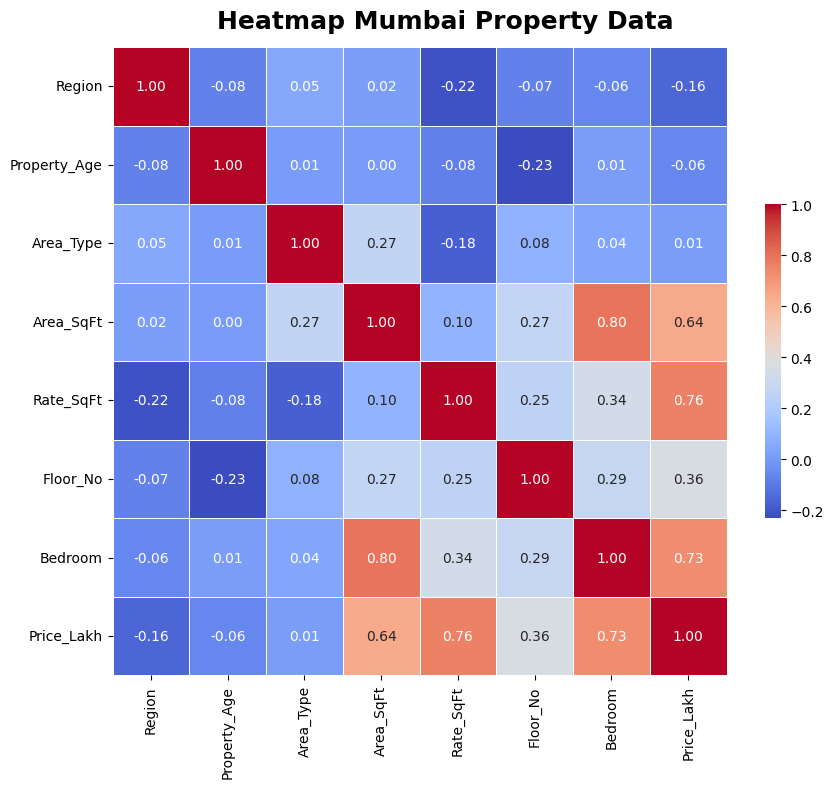

In [18]:
fig = plt.figure( figsize =(9,8))
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
sns.heatmap(mum_prop.corr(),annot = True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='coolwarm')
fig.suptitle('Heatmap Mumbai Property Data',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap_Encoding', dpi = 250)

## 5. Model Building

In [19]:
mum_prop.head()

,Region,Property_Age,Area_Type,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Price_Lakh
0,63,0,3,1943.875,17241.0,14.0,3,399.5
1,111,1,3,1900.000,12631.0,8.0,3,240.0
2,45,2,3,595.000,15966.0,3.0,1,95.0
3,31,3,0,1450.000,25862.0,1.0,3,375.0
4,170,3,1,876.000,39954.0,5.0,2,350.0


### 5.1 Train Test Split

In [20]:
X =  mum_prop.drop('Price_Lakh', axis = 1)
y =  mum_prop['Price_Lakh']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 12)

In [22]:
print(X_train.shape, X_test.shape)

(2056, 7) (515, 7)


### 5.2 Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear_model=linear.fit(X_train, y_train)

print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))


Training Accuracy =  0.9171421408086226
Test Accuracy     =  0.9075363914314135


## Find R2 Score

In [24]:
from sklearn.metrics import r2_score
import numpy as np

# Predictions
y_pred = linear_model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score (Test)   = ", r2)




R² Score (Test)   =  0.9075363914314135


## Obeservaion :
### 1. We select the final model -  LinearRegression.
### 2. We got 90.75% Model Accuracy.

## 6. Final Model Evaluation

In [25]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = model.score(test_features, test_labels)

    print('Average Error  = {:0.4f} degrees'.format(np.mean(errors)))
    print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [26]:
evaluate (linear_model, X_train, y_train)

Average Error  = 22.6342 degrees
Model Accuracy = 0.9171 %


### 6.1 Visualizing Results

In [27]:
pred = linear_model.predict(X_test)

In [28]:
print(X_test.columns)


Index(['Region', 'Property_Age', 'Area_Type', 'Area_SqFt', 'Rate_SqFt',
       'Floor_No', 'Bedroom'],
      dtype='object')


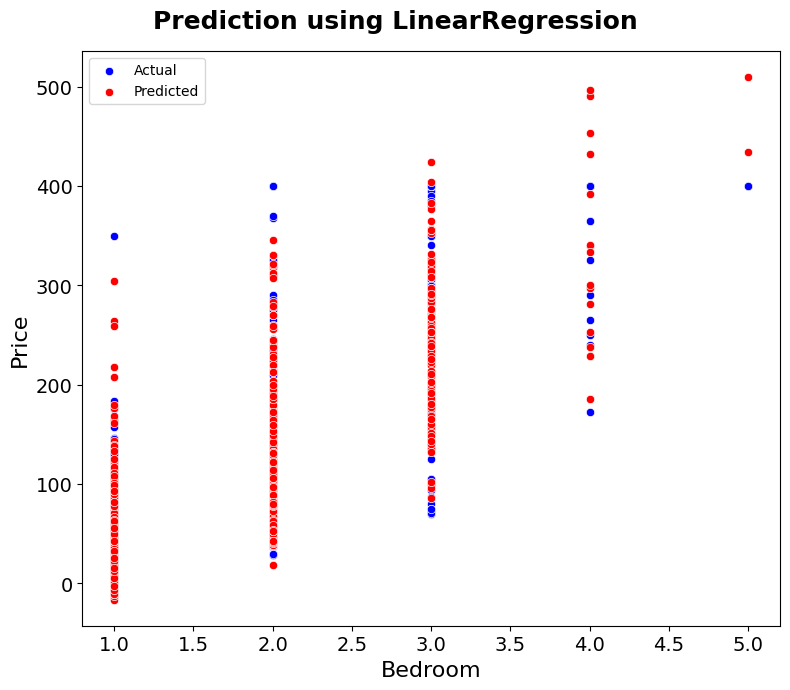

In [29]:
# Choose one feature from X_test to plot against
feature_name = 'Bedroom'  # change this to the actual column you want
x_values = X_test[feature_name]

fig = plt.figure(figsize=(8,7))

sns.scatterplot(x=x_values, y=y_test, label='Actual', color='blue')
sns.scatterplot(x=x_values, y=pred, label='Predicted', color='red')

fig.suptitle('Prediction using LinearRegression', fontsize=18, fontweight='bold')
plt.xlabel(feature_name)
plt.ylabel("Price")
plt.legend()
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()


In [30]:
# # Choose one feature from X_test to plot against
# feature_name = 'Area'  # change this to the actual column you want
# x_values = X_test[feature_name]

# fig = plt.figure(figsize=(8,7))

# sns.scatterplot(x=x_values, y=y_test, label='Actual', color='blue')
# sns.scatterplot(x=x_values, y=pred, label='Predicted', color='red')

# fig.suptitle('Prediction using LinearRegression', fontsize=18, fontweight='bold')
# plt.xlabel(feature_name)
# plt.ylabel("Price")
# plt.legend()
# fig.tight_layout()
# fig.subplots_adjust(top=0.92)
# plt.show()


In [31]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2)
# poly.fit_transform(X)

# # Define the pipeline and train model
# poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])
# poly_model.fit(X_train, y_train)

# # Calculate the Score
# print("Training Accuracy = ", poly_model.score(X_train, y_train))
# print("Test Accuracy     = ", poly_model.score(X_test, y_test))

<!-- ## Obeservaion :
### 1. We select the final model - Polynomial Feature.
### 2. We got 92.19 % Model Accuracy. -->

<!-- ## 6. Final Model Evaluation -->

In [32]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     accuracy = model.score(test_features, test_labels)

#     print('Average Error  = {:0.4f} degrees'.format(np.mean(errors)))
#     print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [33]:
# evaluate (poly_model, X_train, y_train)

In [34]:
# evaluate(poly_model, X_test, y_test)

<!-- ### 6.1 Visualizing Results -->

In [35]:
# pred = poly_model.predict(X_test)

In [36]:
# fig = plt.figure(figsize=(8,7))

# sns.scatterplot(x=y_test, y=pred)
# fig.suptitle('Prediction using Polynomial', fontsize= 18 , fontweight='bold')
# plt.xlabel("Actual")
# plt.ylabel("Prediction")
# pylab.rcParams.update(rcParams)
# fig.tight_layout()
# fig.subplots_adjust(top=0.92)
# plt.show()

# #fig.savefig('Prediction_Polynomial', dpi = 500)